<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/logo.png" width="300" alt="cognitiveclass.ai logo" />
</center>


# Basic Plotly Charts

Estimated time needed: 30 minutes


## Objectives

In this lab, you will learn about creating plotly charts using plotly.graph_objects and plotly.express.

Learn more about:

*   [Plotly python](https://plotly.com/python/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)
*   [Plotly Graph Objects](https://plotly.com/python/graph-objects/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)
*   [Plotly Express](https://plotly.com/python/plotly-express/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)
*   Handling data using [Pandas](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

We will be using the [airline dataset](https://developer.ibm.com/exchanges/data/all/airline/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) from [Data Asset eXchange](https://developer.ibm.com/exchanges/data/).

#### Airline Reporting Carrier On-Time Performance Dataset

The Reporting Carrier On-Time Performance Dataset contains information on approximately 200 million domestic US flights reported to the United States Bureau of Transportation Statistics. The dataset contains basic information about each flight (such as date, time, departure airport, arrival airport) and, if applicable, the amount of time the flight was delayed and information about the reason for the delay. This dataset can be used to predict the likelihood of a flight arriving on time.

Preview data, dataset metadata, and data glossary [here.](https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/data-preview/index.html)


In [1]:
!pip show piplite

In [ ]:
import piplite

await piplite.install(['nbformat', 'plotly'])

In [4]:
!pip install nbformat


In [5]:
!pip install nbformat plotly

In [1]:
# Import required libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Read Data


In [2]:
# Read the airline data into pandas dataframe
#from js import fetch
import io
import requests

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv'
#resp = await fetch(URL)
resp = requests.get(URL).content
#text = io.BytesIO((await resp.arrayBuffer()).to_py())
text = io.BytesIO(resp)
airline_data =  pd.read_csv(text,
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
# Preview the first 5 lines of the loaded data 
airline_data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Shape of the data
airline_data.shape

(27000, 110)

In [5]:
airline_data.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline',
       ...
       'Div4WheelsOff', 'Div4TailNum', 'Div5Airport', 'Div5AirportID',
       'Div5AirportSeqID', 'Div5WheelsOn', 'Div5TotalGTime',
       'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum'],
      dtype='object', length=110)

In [6]:
# Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
data = airline_data.sample(n=500, random_state=42)

In [7]:
# Get the shape of the trimmed data
data.shape

(500, 110)

### Lab structure

#### plotly.graph_objects

1.  Review scatter plot creation

    Theme: How departure time changes with respect to airport distance

2.  **To do** - Create line plot

    Theme: Extract average monthly delay time and see how it changes over the year

#### plotly.express

1.  Review bar chart creation

    Theme: Extract number of flights from a specific airline that goes to a destination

2.  **To do** - Create bubble chart

    Theme: Get number of flights as per reporting airline

3.  **To do** - Create histogram

    Theme: Get distribution of arrival delay

4.  Review pie chart

    Theme: Proportion of distance group by month (month indicated by numbers)

5.  **To do** - Create sunburst chart

    Theme: Hierarchical view in othe order of month and destination state holding value of number of flights


# plotly.graph_objects¶


## 1. Scatter Plot


Learn more about usage of scatter plot [here](https://plotly.com/python/line-and-scatter/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

#### Idea: How departure time changes with respect to airport distance


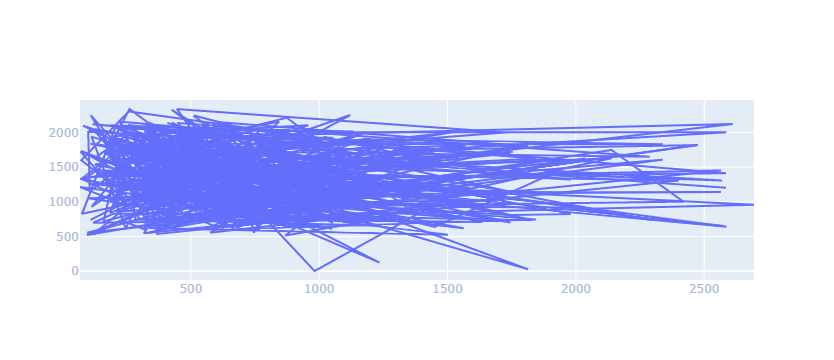

In [17]:
fig = go.Figure(data=go.Scatter(x=data['Distance'], y=data['DepTime']))
fig.show()

In [13]:
go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker={'color':'red'})

Scatter({
    'marker': {'color': 'red'},
    'mode': 'markers',
    'x': array([ 109.,  732.,  117., ..., 1044.,  366., 1182.]),
    'y': array([ 742., 1900., 2120., ..., 1815., 1728., 1208.])
})

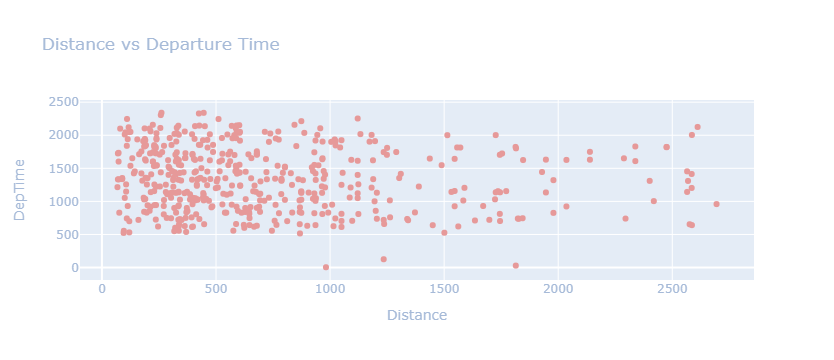

In [43]:
# First we create a figure using go.Figure and adding trace to it through go.scatter
fig = go.Figure(data=go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker=dict(color='red')))
# Updating layout through `update_layout`. Here we are adding title to the plot and providing title to x and y axis.
fig.update_layout(title='Distance vs Departure Time', xaxis_title='Distance', yaxis_title='DepTime')
# Display the figure
fig.show()

## 2. Line Plot


Learn more about line plot [here](https://plotly.com/python/line-charts/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

#### Idea: Extract average monthly arrival delay time and see how it changes over the year.


In [31]:
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
5312,985989,2006,1,3,29,3,2006-03-29,OO,20304,OO,N969SW,6818,13930,1393001,30977,ORD,"Chicago, IL",IL,17.0,Illinois,41,13485,1348501,33485,MSN,"Madison, WI",WI,55.0,Wisconsin,45,705,742.0,37.0,37.0,1.0,2.0,0700-0759,13.0,755.0,821.0,5.0,754,826.0,32.0,32.0,1.0,2.0,0700-0759,0.0,NaN,0.0,49.0,44.0,26.0,1.0,109.0,1,32.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18357,1782939,1993,3,8,3,2,1993-08-03,DL,19790,DL,NaN,1264,11298,1129802,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,10397,1039702,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34,1900,1900.0,0.0,0.0,0.0,0.0,1900-1959,NaN,NaN,NaN,NaN,2157,2156.0,-1.0,0.0,0.0,-1.0,2100-2159,0.0,NaN,0.0,117.0,116.0,NaN,1.0,732.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6428,84140,1989,3,7,3,1,1989-07-03,HP,19991,HP,NaN,325,11423,1142302,31423,DSM,"Des Moines, IA",IA,19.0,Iowa,61,13871,1387101,33316,OMA,"Omaha, NE",NE,31.0,Nebraska,65,2120,2120.0,0.0,0.0,0.0,0.0,2100-2159,NaN,NaN,NaN,NaN,2155,2150.0,-5.0,0.0,0.0,-1.0,2100-2159,0.0,NaN,0.0,35.0,30.0,NaN,1.0,117.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15414,1839736,2008,4,10,10,5,2008-10-10,UA,19977,UA,N553UA,150,14771,1477101,32457,SFO,"San Francisco, CA",CA,6.0,California,91,13930,1393001,30977,ORD,"Chicago, IL",IL,17.0,Illinois,41,1613,1625.0,12.0,12.0,0.0,0.0,1600-1659,28.0,1653.0,2213.0,6.0,2221,2219.0,-2.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,248.0,234.0,200.0,1.0,1846.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10610,1622640,2010,1,2,19,5,2010-02-19,FL,20437,FL,N948AT,719,10397,1039703,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34,12339,1233903,32337,IND,"Indianapolis, IN",IN,18.0,Indiana,42,1401,1355.0,-6.0,0.0,0.0,-1.0,1400-1459,15.0,1410.0,1518.0,5.0,1534,1523.0,-11.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,93.0,88.0,68.0,1.0,432.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [35]:
data.columns.values

array(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth',
       'DayOfWeek', 'FlightDate', 'Reporting_Airline',
       'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline',
       'Tail_Number', 'Flight_Number_Reporting_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
       'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips',
       'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'Dist

In [36]:
list(data.columns)

['Unnamed: 0',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'DOT_ID_Reporting_Airline',
 'IATA_CODE_Reporting_Airline',
 'Tail_Number',
 'Flight_Number_Reporting_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDela

In [39]:
data.columns.to_list()

['Unnamed: 0',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'DOT_ID_Reporting_Airline',
 'IATA_CODE_Reporting_Airline',
 'Tail_Number',
 'Flight_Number_Reporting_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDela

In [37]:
# Group the data by Month and compute average over arrival delay time.
line_data = data.groupby('Month')['ArrDelay'].mean().reset_index()

In [38]:
# Display the data
line_data

,Month,ArrDelay
0,1,2.232558
1,2,2.687500
2,3,10.868421
3,4,6.229167
4,5,-0.279070
5,6,17.310345
6,7,5.088889
7,8,3.121951
8,9,9.081081
9,10,1.200000


#### To do:

*   Create a line plot with x-axis being the month and y-axis being computed average delay time. Update plot title,\
    xaxis, and yaxis title.

*   Hint: Scatter and line plot vary by updating mode parameter.


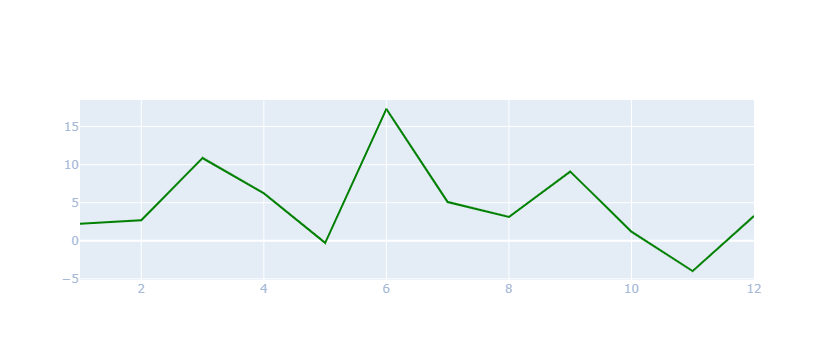

In [45]:
# Create line plot here
fig = go.Figure(go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
fig.show()

Double-click **here** for the solution.

<!-- The answer is below:

fig = go.Figure(data=go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
fig.show()

-->


# plotly.express¶


## 1. Bar Chart


Learn more about bar chart [here](https://plotly.com/python/bar-charts/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

#### Idea: Extract number of flights from a specific airline that goes to a destination


In [47]:
data.head(2)

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
5312,985989,2006,1,3,29,3,2006-03-29,OO,20304,OO,N969SW,6818,13930,1393001,30977,ORD,"Chicago, IL",IL,17.0,Illinois,41,13485,1348501,33485,MSN,"Madison, WI",WI,55.0,Wisconsin,45,705,742.0,37.0,37.0,1.0,2.0,0700-0759,13.0,755.0,821.0,5.0,754,826.0,32.0,32.0,1.0,2.0,0700-0759,0.0,NaN,0.0,49.0,44.0,26.0,1.0,109.0,1,32.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18357,1782939,1993,3,8,3,2,1993-08-03,DL,19790,DL,NaN,1264,11298,1129802,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,10397,1039702,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34,1900,1900.0,0.0,0.0,0.0,0.0,1900-1959,NaN,NaN,NaN,NaN,2157,2156.0,-1.0,0.0,0.0,-1.0,2100-2159,0.0,NaN,0.0,117.0,116.0,NaN,1.0,732.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
data['Flights'].head()

5312     1.0
18357    1.0
6428     1.0
15414    1.0
10610    1.0
Name: Flights, dtype: float64

In [48]:
data['DestState'].head()

5312     WI
18357    GA
6428     NE
15414    IL
10610    IN
Name: DestState, dtype: object

In [49]:
# Group the data by destination state and reporting airline. Compute total number of flights in each combination
bar_data = data.groupby(['DestState'])['Flights'].sum().reset_index()

In [50]:
# Display the data
bar_data

,DestState,Flights
0,AK,4.0
1,AL,3.0
2,AZ,8.0
3,CA,68.0
4,CO,20.0
5,CT,5.0
6,FL,32.0
7,GA,27.0
8,HI,5.0
9,IA,1.0


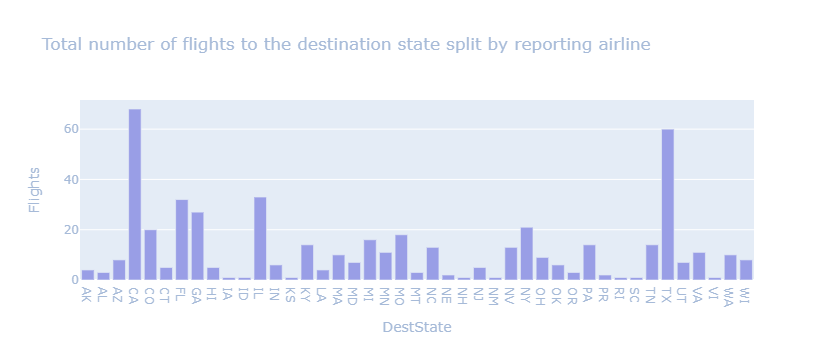

In [51]:
# Use plotly express bar chart function px.bar. Provide input data, x and y axis variable, and title of the chart.
# This will give total number of flights to the destination state.
fig = px.bar(bar_data, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()

## 2. Bubble Chart


Learn more about bubble chart [here](https://plotly.com/python/bubble-charts/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

#### Idea: Get number of flights as per reporting airline


In [52]:
# Group the data by reporting airline and get number of flights
bub_data = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()

In [53]:
bub_data

,Reporting_Airline,Flights
0,9E,5.0
1,AA,57.0
2,AS,14.0
3,B6,10.0
4,CO,12.0
5,DL,66.0
6,EA,4.0
7,EV,11.0
8,F9,4.0
9,FL,3.0


**To do**

*   Create a bubble chart using the `bub_data` with x-axis being reporting airline and y-axis being flights.
*   Provide title to the chart
*   Update size of the bubble based on the number of flights. Use `size` parameter.
*   Update name of the hover tooltip to `reporting_airline` using `hover_name` parameter.


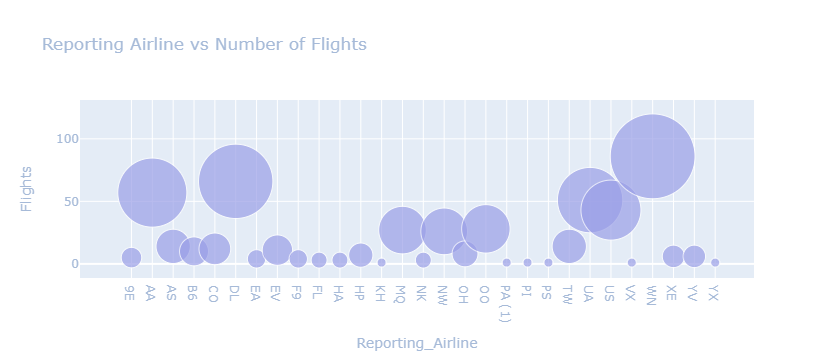

In [54]:
# Create bubble chart here
fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights", size="Flights",
                 hover_name="Reporting_Airline", title='Reporting Airline vs Number of Flights', size_max=60)
fig.show()

Double-click **here** for the solution.

<!-- The answer is below:

    
fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights", size="Flights",
                 hover_name="Reporting_Airline", title='Reporting Airline vs Number of Flights', size_max=60)
fig.show()

-->


# Histogram


Learn more about histogram [here](https://plotly.com/python/histograms/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

#### Idea: Get distribution of arrival delay


In [55]:
# Set missing values to 0
data['ArrDelay'] = data['ArrDelay'].fillna(0)

**To do**

*   Use px.histogram and pass the dataset.
*   Pass `ArrDelay` to x parameter.


In [58]:
data.columns.values

array(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth',
       'DayOfWeek', 'FlightDate', 'Reporting_Airline',
       'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline',
       'Tail_Number', 'Flight_Number_Reporting_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
       'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips',
       'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'Dist

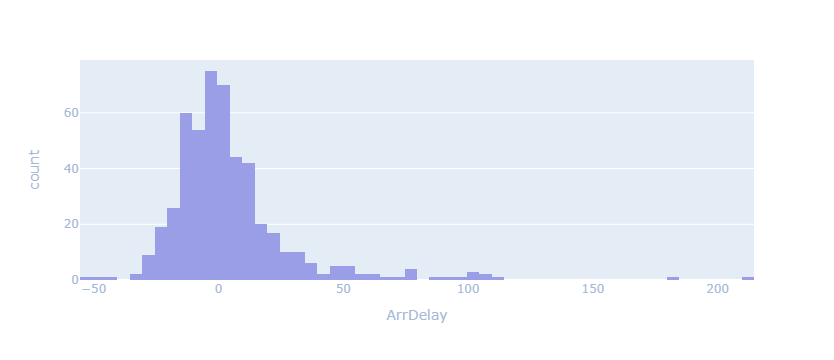

In [60]:
# Create histogram here
fig = px.histogram(data, x='ArrDelay')
fig.show()

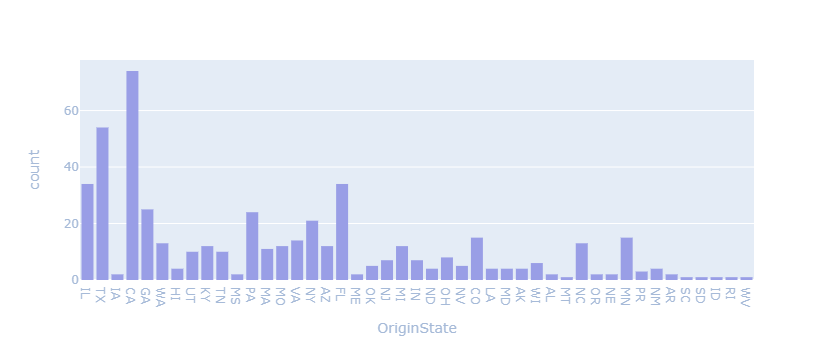

In [59]:
# Create histogram here
fig = px.histogram(data, x='OriginState')
fig.show()

In [66]:
data.groupby(['OriginState'])['Flights'].sum().reset_index()

,OriginState,Flights
0,AK,4.0
1,AL,2.0
2,AR,2.0
3,AZ,12.0
4,CA,74.0
5,CO,15.0
6,FL,34.0
7,GA,25.0
8,HI,4.0
9,IA,2.0


Double-click **here** for the solution.

<!-- The answer is below:

fig = px.histogram(data, x="ArrDelay")
fig.show()

-->


# Pie Chart


Learn more about pie chart [here](https://plotly.com/python/pie-charts/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

#### Idea: Proportion of distance group by month (month indicated by numbers)


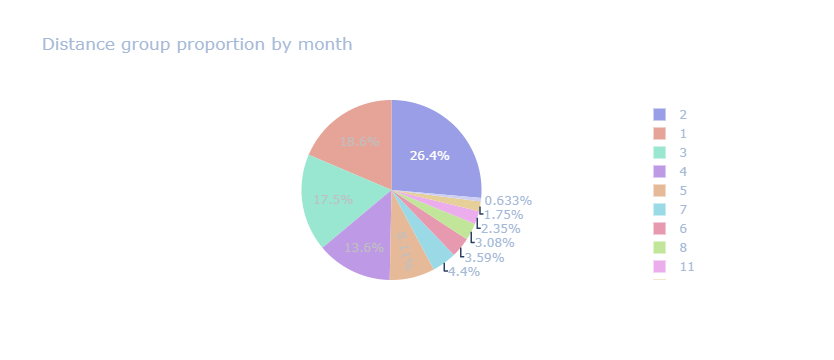

In [69]:
# Use px.pie function to create the chart. Input dataset. 
# Values parameter will set values associated to the sector. 'Month' feature is passed to it.
# labels for the sector are passed to the `names` parameter.
fig = px.pie(data, values='Month', names='DistanceGroup', title='Distance group proportion by month')
fig.show()

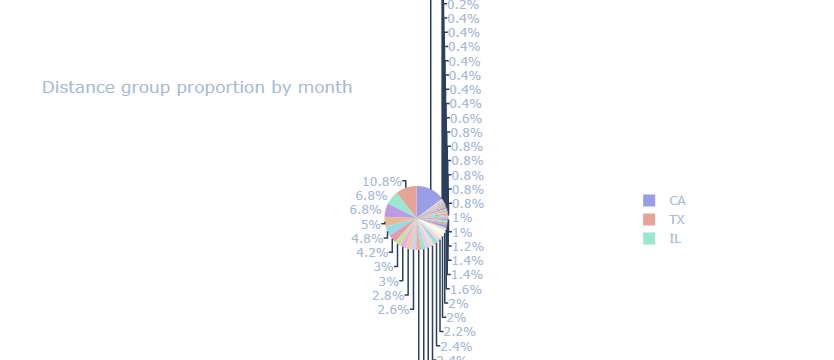

In [70]:
# Use px.pie function to create the chart. Input dataset. 
# Values parameter will set values associated to the sector. 'Month' feature is passed to it.
# labels for the sector are passed to the `names` parameter.
fig = px.pie(data, values='Flights', names='OriginState', title='Distance group proportion by month')
fig.show()

# Sunburst Charts


Learn more about sunburst chart [here](https://plotly.com/python/sunburst-charts/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

#### Idea: Hierarchical view in othe order of month and destination state holding value of number of flights


**To do**

*   Create sunburst chart using `px.sunburst`.
*   Define hierarchy of sectors from root to leaves in `path` parameter. Here, we go from `Month` to `DestStateName` feature.
*   Set sector values in `values` paramter. Here, we can pass in `Flights` feature.
*   Show the figure.


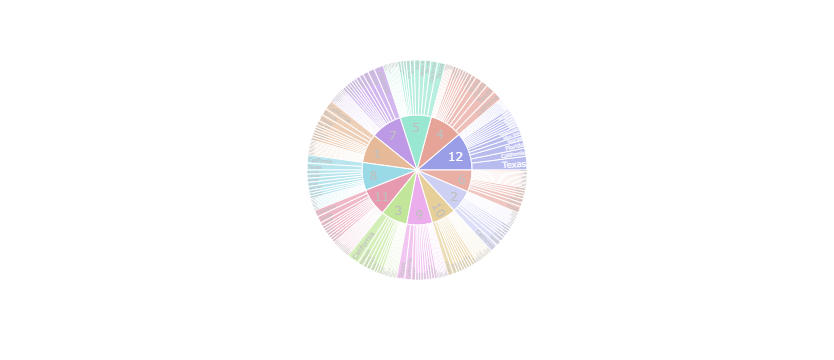

In [71]:
# Create sunburst chart here
fig = px.sunburst(data, path=['Month', 'DestStateName'], values='Flights')
fig.show()


Double-click **here** for the solution.

<!-- The answer is below:
    
fig = px.sunburst(data, path=['Month', 'DestStateName'], values='Flights')
fig.show()

-->


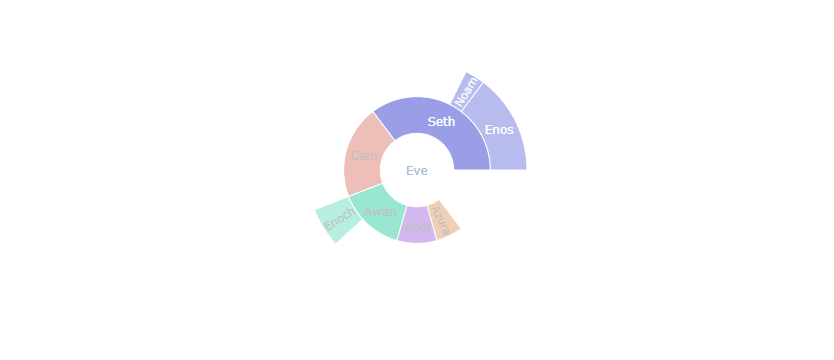

In [74]:
import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

## Summary

Congratulations for completing your first lab.

In this lab, you have learnt how to use `plotly.graph_objects` and `plotly.express` for creating plots and charts.


## Author

[Saishruthi Swaminathan](https://www.linkedin.com/in/saishruthi-swaminathan/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)


## Changelog

| Date       | Version | Changed by | Change Description                   |
| ---------- | ------- | ---------- | ------------------------------------ |
| 12-18-2020 | 1.0     | Nayef      | Added dataset link and upload to Git |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
